<a href="https://colab.research.google.com/github/Yesshh/Dataset-/blob/main/Brain_Tumor_MP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
!pip install opendatasets

In [3]:
import opendatasets as od

In [4]:
od.download("https://www.kaggle.com/datasets/ahmedhamada0/brain-tumor-detection")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: yesh25
Your Kaggle Key: ··········


100%|██████████| 84.0M/84.0M [00:00<00:00, 157MB/s]


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import os
import math
import shutil
import glob
 

In [6]:
# count number of images
ROOT_DIR = "/content/brain-tumor-detection"
number_of_images = {}

for dir in os.listdir(ROOT_DIR):
  number_of_images[dir] = len(os.listdir(os.path.join(ROOT_DIR, dir)))

number_of_images.items() 

dict_items([('yes', 1500), ('pred', 60), ('no', 1500), ('Br35H-Mask-RCNN', 4)])

In [7]:
def dataFolder(p, split):
  if not os.path.exists("./"+p):
    os.mkdir("./"+p)


    for dir in os.listdir(ROOT_DIR):
      os.makedirs("./"+p+"/"+dir)
    
    
      for img in np.random.choice(a = os.listdir(os.path.join(ROOT_DIR, dir)) ,
                                size = (math.floor(split*number_of_images[dir])-2), 
                                replace=False ):
          O = os.path.join(ROOT_DIR,dir,img) #path
          D = os.path.join("./"+p,dir) 
          shutil.copy(O,D)
          os.remove(O)

  else:
    print(f"{p} folder exist")


In [8]:
dataFolder("train",0.7)

In [11]:
dataFolder("val",0.15)

val folder exist


In [12]:
dataFolder("test",0.15)

test folder exist


In [13]:
number_of_images = {}

for dir in os.listdir(ROOT_DIR):
  number_of_images[dir] = len(os.listdir(os.path.join(ROOT_DIR, dir)))

number_of_images.items() 

dict_items([('yes', 229), ('pred', 13), ('no', 229), ('Br35H-Mask-RCNN', 4)])

MODEL BUILD


In [14]:
from keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense, BatchNormalization, GlobalAvgPool2D
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator 
import keras

In [15]:
#CNN Model

model = Sequential()

model.add(Conv2D(filters=16, kernel_size=(3,3),activation= 'relu', input_shape = (224,224,3)))

model.add(Conv2D(filters=36, kernel_size=(3,3),activation= 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),activation= 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=128, kernel_size=(3,3),activation= 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Dropout(rate= 0.25))

model.add(Flatten())
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(rate= 0.25))
model.add(Dense(units= 1, activation= 'sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 36)      5220      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 36)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 64)      20800     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 52, 52, 128)       7

In [16]:
model.compile(optimizer='adam',loss= keras.losses.binary_crossentropy, metrics=['accuracy'])

Preparing our data using data generator

In [17]:
def preprocessingImages1(path):
  """
  imput : path
  output : Pre processed images
  """

  image_data = ImageDataGenerator(zoom_range=0.2, shear_range= 0.2, rescale=1/255, horizontal_flip= True)
  image = image_data.flow_from_directory(directory = path, target_size=(224,224), batch_size=32, class_mode='binary')

  return image

In [18]:
path  = "/content/train"
train_data = preprocessingImages1(path)

Found 2136 images belonging to 4 classes.


In [19]:
def preprocessingImages2(path):
  """
  imput : path
  output : Pre processed images
  """

  image_data = ImageDataGenerator(rescale=1/255, )
  image = image_data.flow_from_directory(directory = path, target_size=(224,224), batch_size=32, class_mode='binary')

  return image

In [20]:
path = "/content/test"
test_data = preprocessingImages2(path)

Found 453 images belonging to 4 classes.


In [21]:
path = "/content/val"
val_data = preprocessingImages2(path)

Found 0 images belonging to 1 classes.


In [22]:
# Early stopping and model check point

from keras.callbacks import ModelCheckpoint, EarlyStopping

# early stopping

es = EarlyStopping(monitor="val_accuracy", min_delta=0.01, patience=5, verbose=1, mode='auto')

# model check point

mc = ModelCheckpoint(monitor="val_accuracy", filepath="./bestmodel.h5", verbose=1, save_best_only=True, mode='auto')

cd = [es,mc]


In [23]:
hs = model.fit_generator(generator= train_data, 
                         steps_per_epoch=8, 
                         epochs= 30, 
                         verbose= 1, 
                         validation_data=val_data, 
                         validation_steps= 16, 
                         callbacks= cd)

Epoch 1/30
8/8 [==============================] - 16s 463ms/step - loss: -365.0779 - accuracy: 0.4531
Epoch 2/30
8/8 [==============================] - 4s 500ms/step - loss: -16387.8008 - accuracy: 0.4336
Epoch 3/30
8/8 [==============================] - 4s 493ms/step - loss: -204433.9844 - accuracy: 0.4492
Epoch 4/30
8/8 [==============================] - 4s 501ms/step - loss: -1324171.3750 - accuracy: 0.4922
Epoch 5/30
8/8 [==============================] - 4s 508ms/step - loss: -7485507.0000 - accuracy: 0.4844
Epoch 6/30
8/8 [==============================] - 4s 508ms/step - loss: -31874152.0000 - accuracy: 0.4492
Epoch 7/30
8/8 [==============================] - 4s 500ms/step - loss: -106135488.0000 - accuracy: 0.4688
Epoch 8/30
8/8 [==============================] - 4s 503ms/step - loss: -341099456.0000 - accuracy: 0.4648
Epoch 9/30
8/8 [==============================] - 4s 491ms/step - loss: -813153088.0000 - accuracy: 0.5195
Epoch 10/30
8/8 [==============================] - 4s 

In [24]:
# model graphical interpretation

h = hs.history
h.keys()

dict_keys(['loss', 'accuracy'])

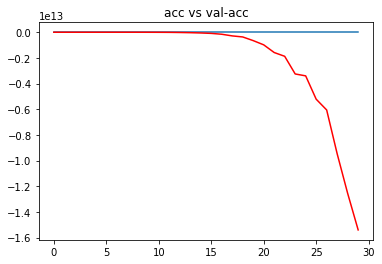

In [26]:
import matplotlib.pyplot as plt
plt.plot(h['accuracy'])
plt.plot(h['loss'], c="red")

plt.title("acc vs val-acc")
plt.show()